In [670]:
import os
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rc('figure',figsize=(9,7))
sns.set_context('paper',font_scale=2)

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from imblearn.over_sampling import SMOTE
#import scikitplot as skplt
from sklearn import tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import classification_report,confusion_matrix,f1_score,mean_squared_error,r2_score

In [93]:
#importing file
path=os.getcwd()+"\\data.csv"
path
data=pd.read_csv(path)
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [94]:
print(f"Size of data: {data['bmi'].size}")


data.isna().sum()

Size of data: 5110


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

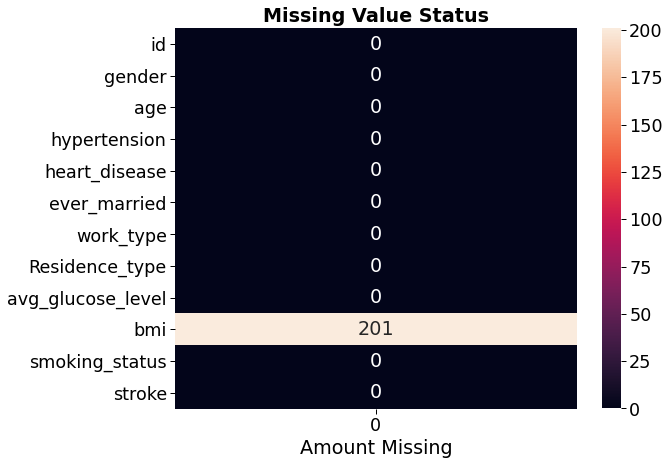

In [95]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d')
ax.set_xlabel('Amount Missing')
plt.show()

In [96]:
data.isna().sum()
print(data['stroke'].sum())

249


In [97]:
#Preprocessing
#Null Data points

for column in data:
    print(f" {column} - Null Data points: {data[column].isnull().sum()}")

#Removing
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi

 id - Null Data points: 0
 gender - Null Data points: 0
 age - Null Data points: 0
 hypertension - Null Data points: 0
 heart_disease - Null Data points: 0
 ever_married - Null Data points: 0
 work_type - Null Data points: 0
 Residence_type - Null Data points: 0
 avg_glucose_level - Null Data points: 0
 bmi - Null Data points: 201
 smoking_status - Null Data points: 0
 stroke - Null Data points: 0


In [98]:
#Changing Ordinal Data to value
data.gender = data.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
data.Residence_type = data.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.uint8)
data.work_type = data.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [99]:
#Data visualisation
print(data.describe())
print(data['stroke'].sum())
#plt.plot(data['bmi'],data['stroke'])


                 id       gender          age  hypertension  heart_disease  \
count   5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.635812    43.226614      0.097456       0.054012   
std    21161.721625     3.592941    22.612647      0.296607       0.226063   
min       67.000000     0.000000     0.080000      0.000000       0.000000   
25%    17741.250000     0.000000    25.000000      0.000000       0.000000   
50%    36932.000000     1.000000    45.000000      0.000000       0.000000   
75%    54682.000000     1.000000    61.000000      0.000000       0.000000   
max    72940.000000   255.000000    82.000000      1.000000       1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean     35.793738        0.508023         106.147677    28.918410   
std      87.982192        0.499985          45.283560     7.731841   
min       0.00000

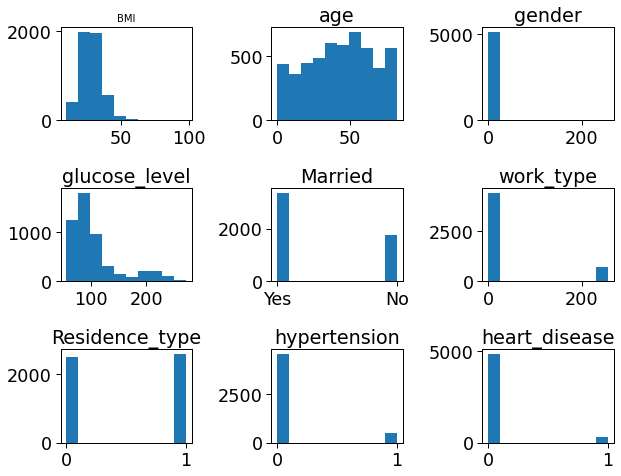

In [677]:
plt.subplot(3,3,1)

plt.hist(data['bmi'])
plt.title("BMI",fontsize=10)
plt.subplot(3,3,2)
plt.hist(data['age'])
plt.title("age")
plt.subplot(3,3,3)
plt.hist(data['gender'])
plt.title("gender")
plt.subplot(3,3,4)
plt.hist(data['avg_glucose_level'])
plt.title("glucose_level")
plt.subplot(3,3,5)
plt.hist(data['ever_married'])
plt.title("Married")
plt.subplot(3,3,6)
plt.hist(data['work_type'])
plt.title("work_type")
plt.subplot(3,3,7)
plt.hist(data['Residence_type'])
plt.title("Residence_type")
plt.subplot(3,3,8)
plt.hist(data['hypertension'])
plt.title("hypertension")
plt.subplot(3,3,9)
plt.hist(data['heart_disease'])
plt.title("heart_disease")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'work_type')

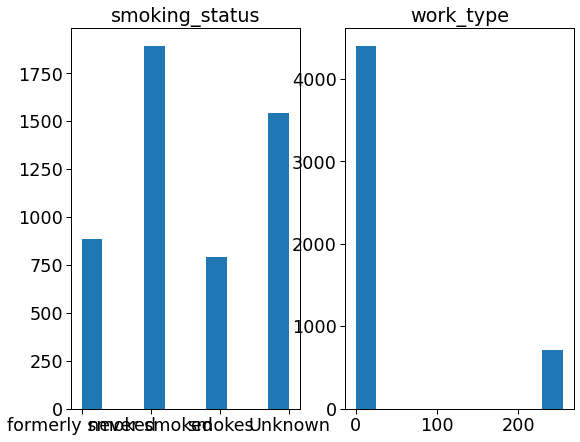

In [678]:
plt.subplot(1,2,1)
plt.hist(data['smoking_status'])
plt.title("smoking_status")
plt.subplot(1,2,2)
plt.hist(data['work_type'])
plt.title("work_type")

In [100]:
fig = ex.pie(data,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples before Upscaling<b>')
fig.show()

 Upsampling 

In [418]:
oversample = SMOTE()
eval_df = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(data.shape[0]*0.2),random_state=42)
train_df = data.drop(index=eval_df.index)

X_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X, y = oversample.fit_resample(X,y)
upsampled_df = X.assign(Stroke = y)

X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
upsampled_eval_df = X_eval.assign(Stroke = y_eval)

In [264]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,0,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,Yes,1,0,202.21,29.879487,never smoked,1
2,31112,0,80.0,0,1,Yes,0,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,Yes,0,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,Yes,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,1,57.0,0,0,Yes,0,0,77.93,21.700000,never smoked,0
5103,22127,1,18.0,0,0,No,0,1,82.85,46.900000,Unknown,0
5104,14180,1,13.0,0,0,No,255,0,103.08,18.600000,Unknown,0
5108,37544,0,51.0,0,0,Yes,0,0,166.29,25.600000,formerly smoked,0


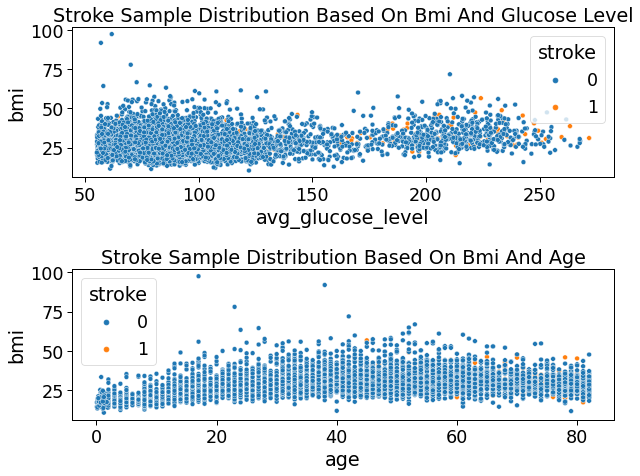

In [102]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=data['avg_glucose_level'],y=data['bmi'],hue=data['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=data['age'],y=data['bmi'],hue=data['stroke'])
plt.tight_layout()
plt.show()

In [103]:
X

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
0,0,67.000000,0,1,0,228.690000,36.600000
1,1,61.000000,0,0,1,202.210000,29.879487
2,0,80.000000,0,1,0,105.920000,32.500000
3,1,49.000000,0,0,0,171.230000,34.400000
4,1,79.000000,1,0,1,174.120000,24.000000
...,...,...,...,...,...,...,...
7797,0,78.656088,0,0,0,76.055174,26.381207
7798,0,80.554818,0,0,1,91.368605,31.466777
7799,1,65.294393,0,0,1,102.656589,29.950898
7800,0,78.454871,0,0,1,91.046673,26.081233


In [268]:
fig = ex.pie(upsampled_df,names='Stroke')
fig.update_layout(title='<b>Stroke Proportion After SMOTE Upsampling<b>')
fig.show()

In [105]:

print(upsampled_df['Stroke'].size)

7802


In [106]:
eval_df

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
4688,0,31.00,0,0,1,64.85,23.000,0
4478,0,40.00,0,0,1,65.29,28.300,0
3849,1,8.00,0,0,255,74.42,22.500,0
4355,1,79.00,1,0,1,76.64,19.500,0
3826,1,75.00,0,0,2,94.77,27.200,0
...,...,...,...,...,...,...,...,...
3605,0,1.88,0,0,255,143.97,17.675,0
4934,0,1.32,0,0,255,107.02,21.350,0
4835,0,49.00,1,0,1,119.30,30.400,0
4105,1,56.00,0,0,1,128.63,24.900,0


In [107]:
fig = ex.pie(upsampled_df[upsampled_df['Stroke']==1],names='gender')
fig.update_layout(title='<b>Gender Proportion After SMOTE Upsampling<b>')
fig.show()

(array([70.,  0.,  0., 90.,  0.,  0., 42.,  0.,  0., 47.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

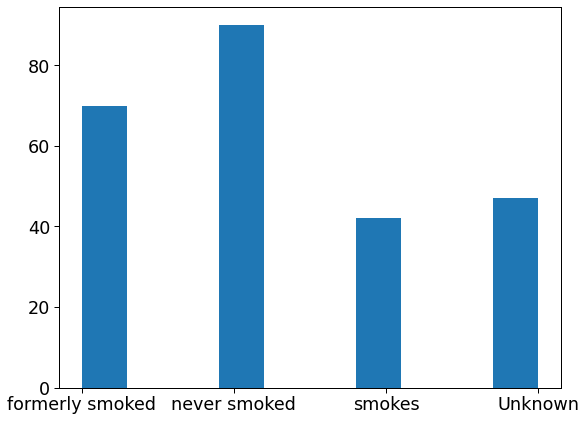

In [108]:
plt.hist(data[data['stroke']==1]['smoking_status'])

(array([220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

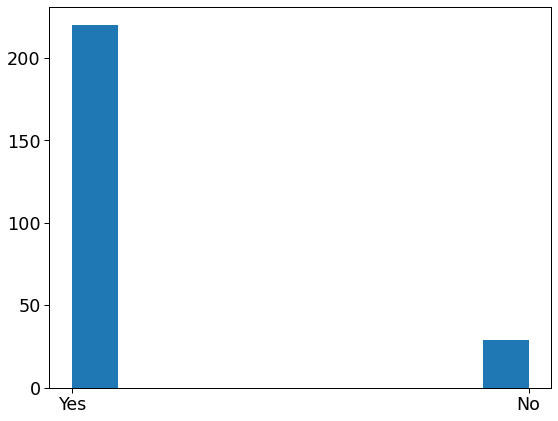

In [109]:
plt.hist(data[data['stroke']==1]['ever_married'])

Text(0.5, 1.0, 'Glucose Level')

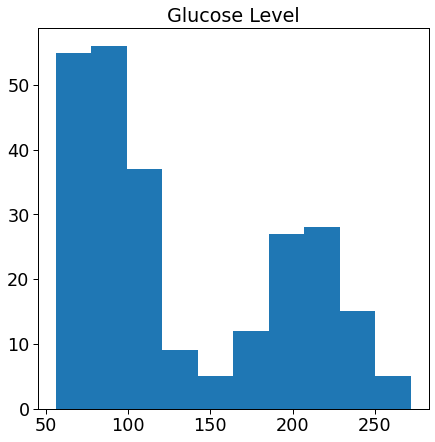

In [621]:
plt.hist(data[data['stroke']==1]['avg_glucose_level'])
plt.title("Glucose Level")

Text(0.5, 1.0, 'BMI')

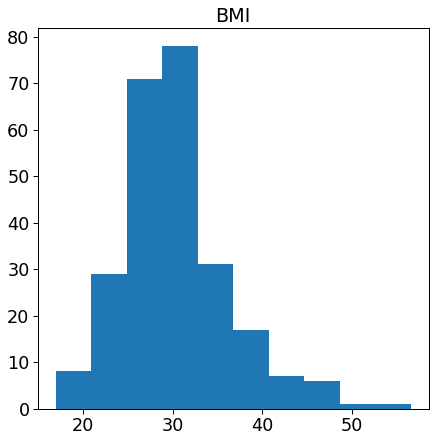

In [622]:
plt.hist(data[data['stroke']==1]['bmi'])
plt.title("BMI")

Text(0.5, 1.0, 'hypertension')

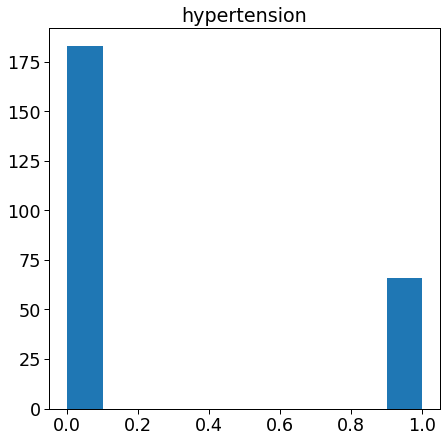

In [623]:
plt.hist(data[data['stroke']==1]['hypertension'])
plt.title("hypertension")

Text(0.5, 1.0, 'Heart Disease')

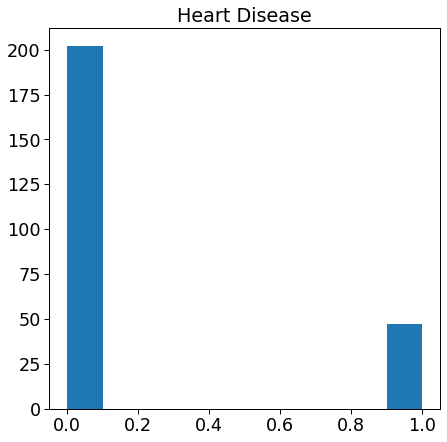

In [624]:
plt.hist(data[data['stroke']==1]['heart_disease'])
plt.title("Heart Disease")

Text(0.5, 1.0, 'Gender 0-Male, 1-Female')

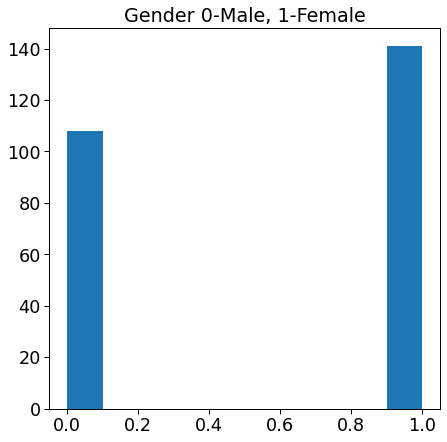

In [627]:
plt.hist(data[data['stroke']==1]['gender'])
plt.title("Gender 0-Male, 1-Female")

Text(0.5, 1.0, 'Age')

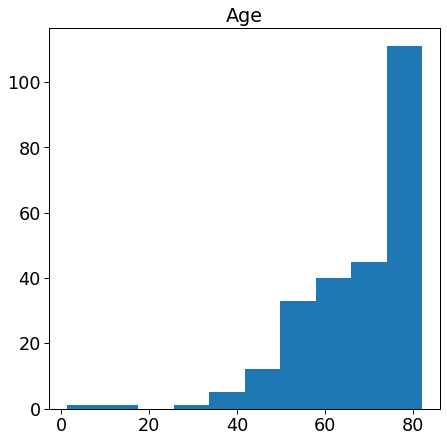

In [628]:
plt.hist(data[data['stroke']==1]['age'])
plt.title("Age")

In [392]:
fig = ex.scatter_3d(None,data['bmi'],data['avg_glucose_level'],data['age'],color=data['stroke']+np.ones(data['bmi'].size),size=data['stroke']+np.ones(data['bmi'].size))
fig.show()

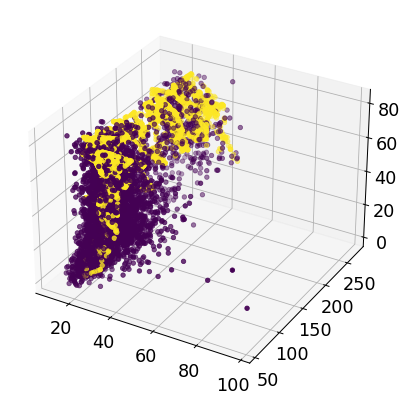

In [111]:
xyz=upsampled_df
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(xyz['bmi'],xyz['avg_glucose_level'],xyz['age'],c=xyz['Stroke'])

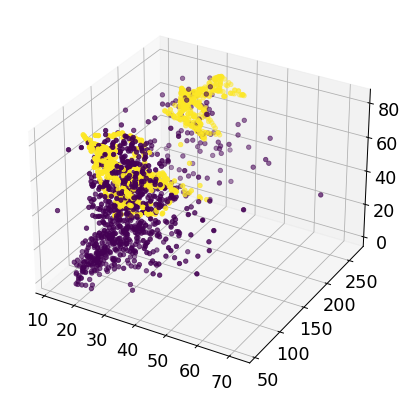

In [390]:
xyz=upsampled_eval_df
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(xyz['bmi'],xyz['avg_glucose_level'],xyz['age'],c=xyz['Stroke'])

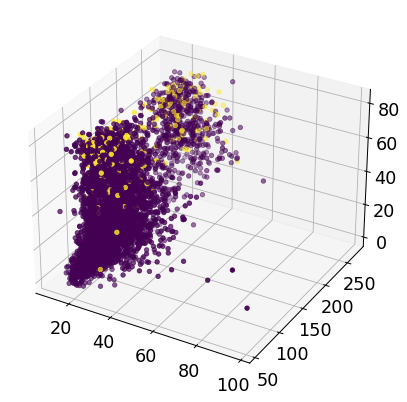

In [395]:
xyz=data
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(xyz['bmi'],xyz['avg_glucose_level'],xyz['age'],c=xyz['stroke'])

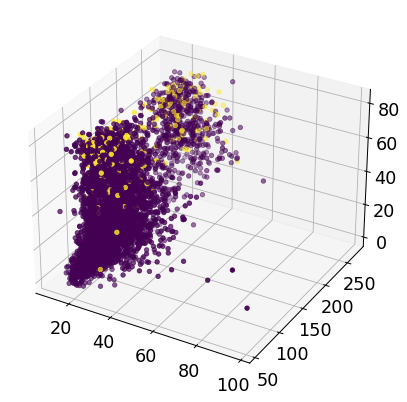

In [112]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['bmi'],data['avg_glucose_level'],data['age'],c=data['stroke'])

In [113]:
np.ones(data.size)

array([1., 1., 1., ..., 1., 1., 1.])

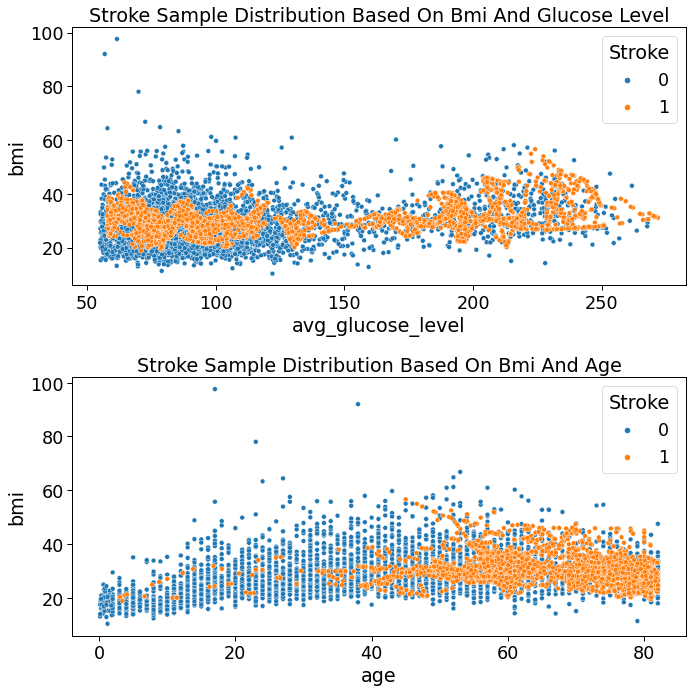

In [126]:
pltdata=upsampled_df

plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=pltdata['avg_glucose_level'],y=pltdata['bmi'],hue=pltdata['Stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=pltdata['age'],y=pltdata['bmi'],hue=pltdata['Stroke'])
plt.tight_layout()

plt.show()

In [629]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =data.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =data.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlation")
fig.show()


In [697]:
DT_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
RF_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestClassifier(random_state=42))])
SVM_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',SVC(random_state=42))])
LR_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',LogisticRegression(random_state=42))])
KNN_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',KNN())])


X = upsampled_df.iloc[:,:-1]
Y = upsampled_df.iloc[:,-1]

X_EVAL = upsampled_eval_df.iloc[:,:-1]
Y_EVAL = upsampled_eval_df.iloc[:,-1]

holdout_x = X.sample(100)
holdout_y = Y.loc[X.index]

X = X.drop(index=holdout_x.index)
Y = Y.drop(index=holdout_x.index)


In [698]:
DT_CLASS_PIPE.fit(X,Y)
RF_CLASS_PIPE.fit(X,Y)
SVM_CLASS_PIPE.fit(X,Y)
LR_CLASS_PIPE.fit(X,Y)
KNN_CLASS_PIPE.fit(X,Y)


Pipeline(steps=[('scale', StandardScaler()), ('DT', KNeighborsClassifier())])

In [699]:
NN_CLASS_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',MLPClassifier(max_iter=500,random_state=42))])
NN_CLASS_PIPE.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('DT', MLPClassifier(max_iter=500, random_state=42))])

In [223]:
X

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
0,0,67.000000,0,1,0,228.690000,36.600000
1,1,61.000000,0,0,1,202.210000,29.879487
2,0,80.000000,0,1,0,105.920000,32.500000
3,1,49.000000,0,0,0,171.230000,34.400000
4,1,79.000000,1,0,1,174.120000,24.000000
...,...,...,...,...,...,...,...
7797,0,72.176515,0,0,0,103.414138,27.364093
7798,1,79.212358,0,0,0,60.260829,29.826709
7799,0,55.303685,0,0,0,74.566125,28.152351
7800,1,80.142242,0,1,0,209.369728,29.819684


In [514]:

DT_CROSS_VAL = cross_val_score(DT_CLASS_PIPE,X,Y,cv=10,scoring='f1')
RF_CROSS_VAL = cross_val_score(RF_CLASS_PIPE,X,Y,cv=10,scoring='f1')
SVM_CROSS_VAL = cross_val_score(SVM_CLASS_PIPE,X,Y,cv=10,scoring='f1')
LR_CROSS_VAL = cross_val_score(LR_CLASS_PIPE,X,Y,cv=10,scoring='f1')
KNN_CROSS_VAL = cross_val_score(KNN_CLASS_PIPE,X,Y,cv=10,scoring='f1')
NN_CROSS_VAL = cross_val_score(NN_CLASS_PIPE,X,Y,cv=10,scoring='f1')

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimizatio

In [712]:
DT_PRED   = DT_CLASS_PIPE.predict(X_EVAL)
RF_PRED   =RF_CLASS_PIPE.predict(X_EVAL)
SVM_PRED  = SVM_CLASS_PIPE.predict(X_EVAL)
LR_PRED   = LR_CLASS_PIPE.predict(X_EVAL)
NN_PRED=NN_CLASS_PIPE.predict(X_EVAL)
KNN_PRED   = KNN_CLASS_PIPE.predict(X_EVAL)


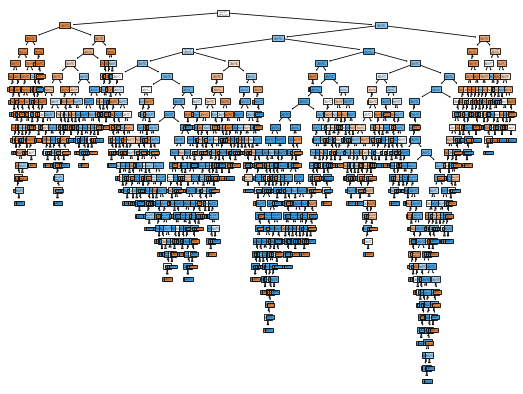

In [293]:
plt.figure()
tree.plot_tree(DT_CLASS_PIPE['DT'],filled=True)
plt.show()


In [713]:
DT_CM  = confusion_matrix(Y_EVAL,DT_PRED )
RF_CM  = confusion_matrix(Y_EVAL,RF_PRED )
SVM_CM = confusion_matrix(Y_EVAL,SVM_PRED)
LR_CM  = confusion_matrix(Y_EVAL,LR_PRED )
NN_CM  = confusion_matrix(Y_EVAL,NN_PRED )
KNN_CM  = confusion_matrix(Y_EVAL,NN_PRED )

DT_F1  = f1_score(Y_EVAL,DT_PRED )
RF_F1  = f1_score(Y_EVAL,RF_PRED )
SVM_F1 = f1_score(Y_EVAL,SVM_PRED)
LR_F1  = f1_score(Y_EVAL,LR_PRED )
NN_F1  = f1_score(Y_EVAL,NN_PRED )
KNN_F1  = f1_score(Y_EVAL,KNN_PRED )

In [500]:
KNN_CM_Train

array([[3300,  559],
       [  89, 3754]], dtype=int64)

In [714]:
DT_CM_Train=confusion_matrix(Y,DT_CLASS_PIPE.predict(X))
RF_CM_Train=confusion_matrix(Y,RF_CLASS_PIPE.predict(X))
LR_CM_Train=confusion_matrix(Y,LR_CLASS_PIPE.predict(X))
SVM_CM_Train=confusion_matrix(Y,SVM_CLASS_PIPE.predict(X))
NN_CM_Train=confusion_matrix(Y,NN_CLASS_PIPE.predict(X))
KNN_CM_Train=confusion_matrix(Y,KNN_CLASS_PIPE.predict(X))


In [715]:
print(DT_CM_Train)
print(RF_CM_Train)
print(LR_CM_Train)
print(SVM_CM_Train)
print(NN_CM_Train)
print(KNN_CM_Train)


[[3857    0]
 [   0 3845]]
[[3857    0]
 [   0 3845]]
[[2932  925]
 [ 668 3177]]
[[2959  898]
 [ 467 3378]]
[[3173  684]
 [ 357 3488]]
[[3293  564]
 [  88 3757]]


In [717]:
fig = make_subplots(rows=6, cols=1,shared_xaxes=True,subplot_titles=('Decision Tree Cross Val Scores',
                                                                     'RandomForest Cross Val Scores',
                                                                    'SVM Cross Val Scores','Logistic Regression Cross Val Scores','NN',"KNN"))

fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=DT_CROSS_VAL,name='Decision Tree'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=RF_CROSS_VAL,name='RandomForest'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=SVM_CROSS_VAL,name='SVM'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=LR_CROSS_VAL,name='Logistic Regression'),
    row=4, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=NN_CROSS_VAL,name='NN'),
    row=5, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=KNN_CROSS_VAL,name='KNN'),
    row=6, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 10 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

In [583]:
Y_EVAL.size

1920

In [719]:
z=RF_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With Random Forest Model Confusion Matrix')
fig.show()
RF_CM

array([[883,  77],
       [433, 527]], dtype=int64)

In [705]:
z=DT_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Upscaled Data With Decision Forest Model Confusion Matrix')
fig.show()
DT_CM

array([[855, 105],
       [493, 467]], dtype=int64)

In [722]:
z=NN_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Upscaled Data With NN Model Confusion Matrix')
fig.show()

In [721]:
z=SVM_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Upscaled Data With SVM Model Confusion Matrix')
fig.show()

In [708]:
z=LR_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On UPscaled Data With Linear Regression Model Confusion Matrix')
fig.show()

In [709]:
z=KNN_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Upscaled Data With KNN Confusion Matrix')
fig.show()

In [720]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','SVM','Logistic Regression','NN',"KNN"],y=[DT_F1,RF_F1,SVM_F1,LR_F1,NN_F1,KNN_F1]))
fig.update_layout(title='F1 Score Of Our Model',xaxis_title='Model',yaxis_title='F1 Score')
fig.show()

In [711]:
fig = go.Figure()
fig.add_trace(go.Bar(x=X.columns,y=RF_CLASS_PIPE['DT'].feature_importances_))
fig.update_layout(title='The Importance Of The Original Attributes On Our Prediction',xaxis_title='Model',yaxis_title='Score')
fig.show()

In [723]:
#Predicting on Original Data


X_EVAL = data.loc[:,X.columns]
Y_EVAL = data.loc[:,'stroke']

DT_PRED   = DT_CLASS_PIPE.predict(X_EVAL)
RF_PRED   =RF_CLASS_PIPE.predict(X_EVAL)
SVM_PRED  = SVM_CLASS_PIPE.predict(X_EVAL)
LR_PRED   = LR_CLASS_PIPE.predict(X_EVAL)
NN_PRED   = NN_CLASS_PIPE.predict(X_EVAL)
KNN_PRED   = KNN_CLASS_PIPE.predict(X_EVAL)

DT_CM  = confusion_matrix(Y_EVAL,DT_PRED )
RF_CM  = confusion_matrix(Y_EVAL,RF_PRED )
SVM_CM = confusion_matrix(Y_EVAL,SVM_PRED)
LR_CM  = confusion_matrix(Y_EVAL,LR_PRED )
NN_CM  = confusion_matrix(Y_EVAL,NN_PRED )
KNN_CM  = confusion_matrix(Y_EVAL,KNN_PRED )

DT_F1  = f1_score(Y_EVAL,DT_PRED )
RF_F1  = f1_score(Y_EVAL,RF_PRED )
SVM_F1 = f1_score(Y_EVAL,SVM_PRED)
LR_F1  = f1_score(Y_EVAL,LR_PRED )
NN_F1  = f1_score(Y_EVAL,NN_PRED )
KNN_F1  = f1_score(Y_EVAL,KNN_PRED )

In [571]:
KNN_PRED

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [725]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','SVM','Logistic Regression','NN',"KNN"],y=[DT_F1,RF_F1,SVM_F1,LR_F1,NN_F1,KNN_F1]))
fig.update_layout(title='F1 Score Of Orginal Data',xaxis_title='Model',yaxis_title='F1 Score')
fig.show()

In [687]:
z=RF_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With Random Forest Model Confusion Matrix')
fig.show()

In [729]:
z=DT_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With DT Confusion Matrix')
fig.show()
DT_CM

array([[4753,  108],
       [  48,  201]], dtype=int64)

In [731]:
z=LR_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With LR Confusion Matrix')
fig.show()
LR_CM


array([[3702, 1159],
       [  81,  168]], dtype=int64)

In [732]:
z=NN_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With NN Confusion Matrix')
fig.show()
NN_CM

array([[3998,  863],
       [  88,  161]], dtype=int64)

In [733]:
z=SVM_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With SVM Confusion Matrix')
fig.show()
SVM_CM

array([[3752, 1109],
       [  86,  163]], dtype=int64)

In [734]:
z=KNN_CM
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With KNN Confusion Matrix')
fig.show()
KNN_CM

array([[4104,  757],
       [  62,  187]], dtype=int64)

In [503]:
#Model On original Data
eval_df = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(data.shape[0]*0.2),random_state=42)
train_df = data.drop(index=eval_df.index)

x_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
x,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']

DT_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
RF_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestClassifier(random_state=42))])
SVM_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',SVC(random_state=42))])
LR_CLASS_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',LogisticRegression(random_state=42))])
NN_CLASS_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',MLPClassifier(random_state=42))])
KNN_CLASS_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',KNN())])

DT_CLASS_PIPE.fit(x,y)
RF_CLASS_PIPE.fit(x,y)
SVM_CLASS_PIPE.fit(x,y)
LR_CLASS_PIPE.fit(x,y)
NN_CLASS_PIPE.fit(x,y)
KNN_CLASS_PIPE.fit(x,y)



Pipeline(steps=[('scale', StandardScaler()), ('DT', KNeighborsClassifier())])

In [506]:
DT_CM_Train=confusion_matrix(y,DT_CLASS_PIPE.predict(x))
RF_CM_Train=confusion_matrix(y,RF_CLASS_PIPE.predict(x))
LR_CM_Train=confusion_matrix(y,LR_CLASS_PIPE.predict(x))
SVM_CM_Train=confusion_matrix(y,SVM_CLASS_PIPE.predict(x))
NN_CM_Train=confusion_matrix(y,NN_CLASS_PIPE.predict(x))
KNN_CM_Train=confusion_matrix(y,KNN_CLASS_PIPE.predict(x))
print(DT_CM_Train)
print(RF_CM_Train)
print(LR_CM_Train)
print(SVM_CM_Train)
print(NN_CM_Train)
print(KNN_CM_Train)

[[3901    0]
 [   0  187]]
[[3901    0]
 [   1  186]]
[[3901    0]
 [ 187    0]]
[[3901    0]
 [ 187    0]]
[[3901    0]
 [ 187    0]]
[[3896    5]
 [ 179    8]]


In [509]:
DT_CM_Test=confusion_matrix(y_eval,DT_CLASS_PIPE.predict(x_eval))
RF_CM_Test=confusion_matrix(y_eval,RF_CLASS_PIPE.predict(x_eval))
LR_CM_Test=confusion_matrix(y_eval,LR_CLASS_PIPE.predict(x_eval))
SVM_CM_Test=confusion_matrix(y_eval,SVM_CLASS_PIPE.predict(x_eval))
NN_CM_Test=confusion_matrix(y_eval,NN_CLASS_PIPE.predict(x_eval))
KNN_CM_Test=confusion_matrix(y_eval,KNN_CLASS_PIPE.predict(x_eval))
print(DT_CM_Test)
print(RF_CM_Test)
print(LR_CM_Test)
print(SVM_CM_Test)
print(NN_CM_Test)
print(KNN_CM_Test)

[[926  34]
 [ 50  12]]
[[959   1]
 [ 61   1]]
[[960   0]
 [ 62   0]]
[[960   0]
 [ 62   0]]
[[960   0]
 [ 62   0]]
[[957   3]
 [ 61   1]]


In [617]:
z=NN_CM_Test
fig = ff.create_annotated_heatmap(z, x=['Predicted Not Stroke','Predicted Stroke'], y=['Not Stroke','Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Upscaled Data With KNN Confusion Matrix')
fig.show()
KNN_CM

array([[772, 188],
       [198, 762]], dtype=int64)

In [735]:
from sklearn.linear_model import BayesianRidge, LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

In [736]:
eval_df = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(data.shape[0]*0.2),random_state=42)
train_df = data.drop(index=eval_df.index)

x_eval,y_eval = eval_df[['age','hypertension','work_type','avg_glucose_level','stroke']], eval_df['bmi']
x,y = train_df[['age','hypertension','work_type','avg_glucose_level','stroke']], train_df['bmi']
DT_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeRegressor(random_state=42))])
RF_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestRegressor())])

LR_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',LinearRegression())])

RR_REG_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',Ridge(random_state=42))])

DT_REG_PIPE.fit(x,y)
RF_REG_PIPE.fit(x,y)

LR_REG_PIPE.fit(x,y)
RR_REG_PIPE.fit(x,y)




Pipeline(steps=[('scale', StandardScaler()), ('DT', Ridge(random_state=42))])

In [482]:
NN_REG_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',MLPRegressor(max_iter=500,hidden_layer_sizes=(100,),activation='relu',random_state=42))])
NN_REG_PIPE.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('DT', MLPRegressor(max_iter=500, random_state=42))])

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Pipeline(steps=[('scale', StandardScaler()),
                ('DT', MLPRegressor(random_state=42))])

G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Pipeline(steps=[('scale', StandardScaler()),
                ('DT',
                 MLPRegressor(activation='tanh', hidden_layer_sizes=(50,),
                              random_state=42))])

In [739]:
DT_TrainSc=DT_REG_PIPE.score(x,y)
RF_TrainSc=RF_REG_PIPE.score(x,y)
LR_TrainSc=LR_REG_PIPE.score(x,y)
NN_TrainSc=NN_REG_PIPE.score(x,y)
RR_TrainSc=RR_REG_PIPE.score(x,y)


fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN','RR'],y=[DT_TrainSc,RF_TrainSc,LR_TrainSc,NN_TrainSc,RR_TrainSc]))
fig.update_layout(title='Train R Squared Score Of Our Model On Train Data',xaxis_title='Model',yaxis_title='Rsq Score')
fig.show()

In [740]:
DT_TestSc=DT_REG_PIPE.score(x_eval,y_eval)
RF_TestSc=RF_REG_PIPE.score(x_eval,y_eval)
LR_TestSc=LR_REG_PIPE.score(x_eval,y_eval)
NN_TestSc=NN_REG_PIPE.score(x_eval,y_eval)
RR_TestSc=RR_REG_PIPE.score(x_eval,y_eval)



print(DT_TestSc,RF_TestSc,LR_TestSc,NN_TestSc)

fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN','RR'],y=[DT_TestSc,RF_TestSc,LR_TestSc,NN_TestSc,RR_TestSc]))
fig.update_layout(title='R Squared Score Of Our Model On Test Data',xaxis_title='Model',yaxis_title='Rsq Score')
fig.show()

-0.6646337955728767 0.04774651925475859 0.23571360922580809 0.29429564603278857


In [744]:
#MSE TEST
DT_TEST_MSE=mean_squared_error(DT_REG_PIPE.predict(x_eval),y_eval)
RF_TEST_MSE=mean_squared_error(RF_REG_PIPE.predict(x_eval),y_eval)
LR_TEST_MSE=mean_squared_error(LR_REG_PIPE.predict(x_eval),y_eval)
RR_TEST_MSE=mean_squared_error(RR_REG_PIPE.predict(x_eval),y_eval)
NN_TEST_MSE=mean_squared_error(NN_REG_PIPE.predict(x_eval),y_eval)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN','RR'],y=[DT_TEST_MSE,RF_TEST_MSE,LR_TEST_MSE,NN_TEST_MSE,RR_TEST_MSE]))
fig.update_layout(title='MSE Test Of  Model ',xaxis_title='Model',yaxis_title='MSE')
fig.show()

In [479]:
y_eval

4688    23.000
4478    28.300
3849    22.500
4355    19.500
3826    27.200
         ...  
3605    17.675
4934    21.350
4835    30.400
4105    24.900
2902    27.300
Name: bmi, Length: 1022, dtype: float64

In [475]:
DT_REG_PIPE.predict(x_eval)

array([35.8       , 17.4       , 18.8       , ..., 40.2       ,
       34.2       , 29.62083333])

In [746]:
DT_TRAIN_MSE=mean_squared_error(DT_REG_PIPE.predict(x),y)
RF_TRAIN_MSE=mean_squared_error(RF_REG_PIPE.predict(x),y)
LR_TRAIN_MSE=mean_squared_error(LR_REG_PIPE.predict(x),y)
RR_TRAIN_MSE=mean_squared_error(RR_REG_PIPE.predict(x),y)
NN_TRAIN_MSE=mean_squared_error(NN_REG_PIPE.predict(x),y)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN','RR'],y=[DT_TRAIN_MSE,RF_TRAIN_MSE,LR_TRAIN_MSE,NN_TRAIN_MSE,RR_TRAIN_MSE]))
fig.update_layout(title='MSE TRAIN Of Our Model' ,xaxis_title='Model',yaxis_title='MSE Score')
fig.show()

In [463]:
y

0       36.600000
1       29.879487
2       32.500000
3       34.400000
4       24.000000
          ...    
5102    21.700000
5103    46.900000
5104    18.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 4088, dtype: float64

In [487]:
ueval_df = upsampled_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','Stroke']].sample(int(data.shape[0]*0.2),random_state=42)
utrain_df = upsampled_df.drop(index=eval_df.index)

ux_eval,uy_eval = ueval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','Stroke']], ueval_df['bmi']
ux,uy = utrain_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','Stroke']], utrain_df['bmi']

uDT_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeRegressor(random_state=42))])
uRF_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestRegressor())])

uLR_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',LinearRegression())])
uNN_REG_PIPE=Pipeline(steps = [('scale',StandardScaler()),('DT',MLPRegressor(random_state=42))])
uRR_REG_PIPE = Pipeline(steps = [('scale',StandardScaler()),('DT',RandomForestRegressor())])
uDT_REG_PIPE.fit(ux,uy)
uRF_REG_PIPE.fit(ux,uy)

uLR_REG_PIPE.fit(ux,uy)
uNN_REG_PIPE.fit(ux,uy)
uRR_REG_PIPE.fit(ux,uy)



G:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Pipeline(steps=[('scale', StandardScaler()), ('DT', RandomForestRegressor())])

In [488]:
uDT_TrainSc=uDT_REG_PIPE.score(ux,uy)
uRF_TrainSc=uRF_REG_PIPE.score(ux,uy)
uLR_TrainSc=uLR_REG_PIPE.score(ux,uy)
uNN_TrainSc=uNN_REG_PIPE.score(ux,uy)
uRR_TrainSc=uRR_REG_PIPE.score(ux,uy)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN',"RR"],y=[uDT_TrainSc,uRF_TrainSc,uLR_TrainSc,uNN_TrainSc,uRR_TrainSc]))
fig.update_layout(title='R Squared Score Of Our Model On Upscaled Data',xaxis_title='Model',yaxis_title='Rsq Score')
fig.show()

In [490]:
uDT_TestSc=uDT_REG_PIPE.score(ux_eval,uy_eval)
uRF_TestSc=uRF_REG_PIPE.score(ux_eval,uy_eval)
uLR_TestSc=uLR_REG_PIPE.score(ux_eval,uy_eval)
uNN_TestSc=uNN_REG_PIPE.score(ux_eval,uy_eval)
uRR_TestSc=uRR_REG_PIPE.score(ux_eval,uy_eval)
print(uDT_TestSc,uRF_TestSc,uLR_TestSc,uNN_TestSc)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Decision Tree','Random Forest','LR','NN',"RR"],y=[uDT_TestSc,uRF_TestSc,uLR_TestSc,uNN_TestSc,uRR_TestSc]))
fig.update_layout(title='R Squared Score Of Our Model On Upscaled Data',xaxis_title='Model',yaxis_title='R Sq Score')
fig.show()
#Better performance on Upscaled Data

0.6368781847777083 0.7401859802323194 0.2664113160116992 0.3743572667398293
